In [78]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
iris = load_iris()

In [80]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [81]:
features = iris['data']
feature_names = iris['feature_names']
label = iris['target']
df = pd.DataFrame(features, columns = feature_names)

In [82]:
pd.DataFrame(features, columns = feature_names)
df['target'] = label

In [83]:
seto = df[df['target'] == 0]
versi = df[df['target'] == 1]
virgi = df[df['target'] == 2]

In [84]:
seto.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [85]:
seto_sepal_length = seto['sepal length (cm)']

In [86]:
versi_sepal_length = versi['sepal length (cm)']

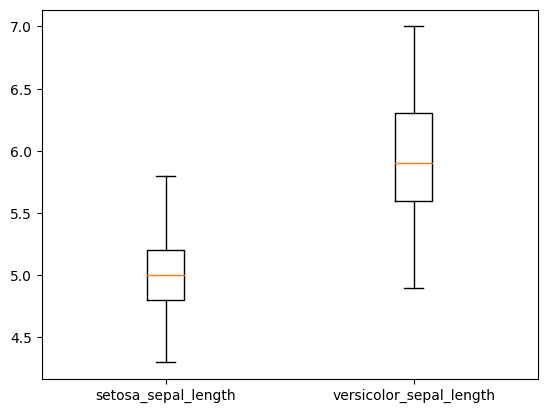

In [87]:
plt.boxplot([seto_sepal_length, versi_sepal_length])
plt.xticks([1,2], ['setosa_sepal_length', 'versicolor_sepal_length'])
plt.show()

In [88]:
from scipy import stats

In [89]:
normal_seto = stats.shapiro(seto_sepal_length)
normal_versi = stats.shapiro(versi_sepal_length)

In [90]:
print(normal_seto)
print(normal_versi)

ShapiroResult(statistic=0.9776986837387085, pvalue=0.4595174193382263)
ShapiroResult(statistic=0.9778358340263367, pvalue=0.46474313735961914)


In [91]:
stats.levene(seto_sepal_length, versi_sepal_length)

LeveneResult(statistic=8.172720533728683, pvalue=0.005195521631017526)

In [92]:
stats.ttest_ind(seto_sepal_length, versi_sepal_length, equal_var=False)

Ttest_indResult(statistic=-10.52098626754911, pvalue=3.746742613983842e-17)

In [93]:
virgi_sepal_length = virgi['sepal length (cm)']

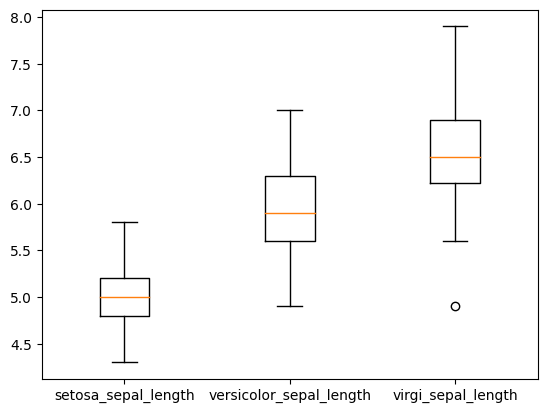

In [94]:
plt.boxplot([seto_sepal_length, versi_sepal_length, virgi_sepal_length])
plt.xticks([1, 2, 3], ['setosa_sepal_length', 'versicolor_sepal_length', 'virgi_sepal_length'])
plt.show()

In [95]:
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [96]:
newData = pd.concat([df.iloc[:, 0], df.iloc[:, -1]], axis=1)

In [97]:
newData = np.array(newData)

In [98]:
seto_array = newData[newData[:, 1]==0]

In [99]:
versi_array = newData[newData[:, 1]==1]

In [100]:
virgi_array = newData[newData[:, 1]==2]

In [101]:
F_statistics, p_val = stats.f_oneway(seto_array[:, 0],
                                     versi_array[:, 0],
                                     virgi_array[:, 0])

In [102]:
print('F statistics is:', F_statistics, 'p value is:', p_val)

F statistics is: 119.26450218450468 p value is: 1.6696691907693826e-31


In [103]:
!pip install statsmodels

In [104]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [105]:
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [106]:
df.rename()

TypeError: must pass an index to rename

In [ ]:
df = df.rename(columns={'sepal length (cm)':'sepal_length'})

In [ ]:
iris_result = ols("sepal_length ~ target", data=df).fit()

In [107]:
sm.stats.anova_lm(iris_result, type=2)

,df,sum_sq,mean_sq,F,PR(>F)
target,1.0,62.568100,62.568100,233.838996,2.890478e-32
Residual,148.0,39.600233,0.267569,NaN,NaN


In [108]:
df = df.rename(columns={'petal_length (cm)':'petal_length'})

In [109]:
petal_result = ols("petal_length ~ target", data=df).fit()

PatsyError: Error evaluating factor: NameError: name 'petal_length' is not defined
    petal_length ~ target
    ^^^^^^^^^^^^

In [111]:
sm.stats.anova_lm(petal_result, type=2)

NameError: name 'petal_result' is not defined